Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved BSD-3 license. (c) Lorena A. Barba, Gilbert F. Forsyth 2017. Thanks to NSF for support via CAREER award #1149784." <a href="https://twitter.com/LorenaABarba">@LorenaABarba</a>

<h1>12 steps to Navier–Stokes</h1>
<hr>

<p>The final two steps in this interactive module teaching beginning CFD with Python will both solve the Navier–Stokes equations in two dimensions, but with different boundary conditions.</p>

The momentum equation in vector form for a velocity field $\vec{\textbf{v}}$ is:

$$\frac{\partial \vec{\textbf{v}}}{\partial t}+(\vec{\textbf{v}}\cdot\nabla)\vec{\textbf{v}}=-\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{\textbf{v}}$$

This vector equation represents three scalar equations, one for each velocity component $(u,v,w)$. But we will solve it in two dimensions $(u,v)$, so there will be two scalar equations.

Remember the continuity equation, in incompressable flow? This is where the Poisson equation for pressure comes in!

$$
\nabla \cdot\vec{\textbf{v}} = 0 \\
$$

<h2>Step 11: Cavity Flow with Navier–Stokes</h2>
<p>Here is the system of differential equations for 2 Dimensions: two equations for the velocity components $u,v$ and one equation for pressure:</p>

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$
<p>From the previous steps, we already know how to discretize all these terms. Only the last equation is a little unfamiliar. But with a little patience, it will not be hard!</p>

<h2>Discretized equations</h2>
<p>First, let's discretize the $u$-momentum equation, as follows:

$$
\begin{split}
\frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\ 
\qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right) 
\end{split}
$$

<p>Similarly for the $v$-momentum equation:</p>

$$
\begin{split}
\frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
\qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y}
+\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$
<p>Finally, the discretized pressure-Poisson equation can be written thus:</p>

$$
\begin{split}
\frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
\qquad \rho \left[ \frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) -\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

You should write these equations down from your own notes, by hand, following each term mentally as you write it.

<p>As before, let's rearrange the equations in the way that the iterations need to proceed in the code. First, the momentum equations for the velocity at the next time step.</p>

<p>The momentum equation in the $u$ direction:</p>

\begin{split}
& u_{i,j}^{n+1} = u_{i,j}^{n} - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
&  - \frac{\Delta t}{\rho 2\Delta x} \left(p_{i+1,j}^{n}-p_{i-1,j}^{n}\right) \\
&  + \nu \left(\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right)
\end{split}


<p>The momentum equation in the $v$ direction:</p>


\begin{split}
& v_{i,j}^{n+1} = v_{i,j}^{n} - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n})\right) \\
& - \frac{\Delta t}{\rho 2\Delta y} \left(p_{i,j+1}^{n}-p_{i,j-1}^{n}\right) \\
& + \nu \left(\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right)
\end{split}


<p>Almost there! Now, we rearrange the pressure-Poisson equation:</p>
\begin{split}
p_{i,j}^{n} =  \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
 -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
 \times \left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}


The initial condition is $u, v, p = 0$ everywhere, and the boundary conditions are:

$u=1$ at $y=2$ (the "lid");

$u, v=0$ on the other boundaries;

$\frac{\partial p}{\partial y}=0$ at $y=0$;

$p=0$ at $y=2$

$\frac{\partial p}{\partial x}=0$ at $x=0,2$

Implementing Cavity Flow

In [1]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

<p><strong>Note:</strong></p>
<p>Kinematic Viscosity (Momentum diffusivity) $\nu_k$ relates Density and viscosity. The definition of this relationship is $\nu_k = \frac{\mu}{\rho}$(stokes). i.e. viscosity of fluid ($\mu$) over the density of the fluid ($\rho$). Common units are $\frac{cm^2}{t}$, $\frac{length^2}{time}$</p>
<p>Standard conditions values for Kinematic Viscosity are:
<ul>
    <li>H_2O ~ 0.01 stokes</li>
    <li>Air ~ 0.15 stokes</li>
    <li>Hg ~ 0.0011 stokes</li>
    <li>glycerine ~ 11 stokes (<strong>Very</strong> temperature dependent)</li>
</ul></p>
<a href="file:///G:/Users/Bob_Bumpous/Documents/_Airplanes/Airplane%20Design/Airplane%20Design%20Standards%20and%20References/Glossary%20of%20terms%20in%20Fluid%20Mechanics.pdf">Airplane Design Standards and References - Glossary Of terms in Fluid Mechanics</a>

In [2]:
# Parameters
nx = 41
ny = 41
nt = 500
nit = 50
c=1

# Size of the dx and dy and dt increments
dx = 2 / (nx-1)
dy = 2 / (ny-1)
dt = 0.001

# Build our base.
x = numpy.linspace(0,2,nx)
y = numpy.linspace(0,2,ny)
X, Y = numpy.meshgrid(x, y)

rho = 1 # The density of fluid or fluid density, denoted ρ (Greek: rho)
nu = 0.1 # Kinematic Viscosity of the fluid


# The initial condition is 𝑢,𝑣,𝑝=0 everywhere
u  = numpy.zeros((ny, nx))
v  = numpy.zeros((ny, nx))
p  = numpy.zeros((ny, nx))   
b  = numpy.zeros((ny, nx))

The pressure Poisson equation that's written above can be hard to write out as code without typos. The function <code>build_up_b</code> below represents the contents of the square brackets [ ], so that the entirety of the PPE is slightly more manageable.  
<p><b>Note:</b> The 3rd term and the 5th term inside the [ ] above are both squares and appear in the code below as (())**2.</p>

In [3]:
# I had a hard time keeping all the terms in [] straight, so I cheated and copied code from Github.
def build_up_b(b, rho, dt, u, v, dx, dy):
    
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx) + 
                     (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                    ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2)

    return b

The function <code>pressure_poisson</code> is also defined to help segregate the different rounds of calculations.   Note the presence of the pseudo-time variable $nit$.  This sub-iteration of the Poisson calculation helps ensure a divergence free field.

In [4]:
def pressure_poisson(p, dx, dy, b):
    pn = numpy.empty_like(p)
    pn = p.copy() # since p.copy occurs as the first step of the for look, this is wasted code and should be deleted.
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 +
                         (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) / 
                         (2 * (dx**2 + dy**2)) -
                         dx**2 * dy**2 / (2 * (dx**2 + dy**2)) *
                         b[1:-1, 1:-1])
        p[:, -1] = p[:, -2]   # dp/dx = 0 at x = 2          
        p[0, :] = p[1, :]     # dp/dy = 0 at y = 0     
        p[:, 0] = p[:, 1]     # dp/dx = 0 at x = 0     
        p[-1, :] = 0          # p = 0 at y = 2
        
        return p
        

Finally, the rest of the cavity flow equations are wrapped inside the function <code>cavity_flow</code>, allowing us to easily plot the results of the cavity flow solver for different lingths of time.

In [5]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b = numpy.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 1    # set velocity on cavity lid equal to 1
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
        
        
    return u, v, p

Lets try nt = 100 and see what the solver gives us.

In [6]:
u  = numpy.zeros((ny, nx))
v  = numpy.zeros((ny, nx))
p  = numpy.zeros((ny, nx))   #set our initial pressure to 0 everywhere
b  = numpy.zeros((ny, nx))
nt = 100
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

Text(0.5, 0, 'Y')

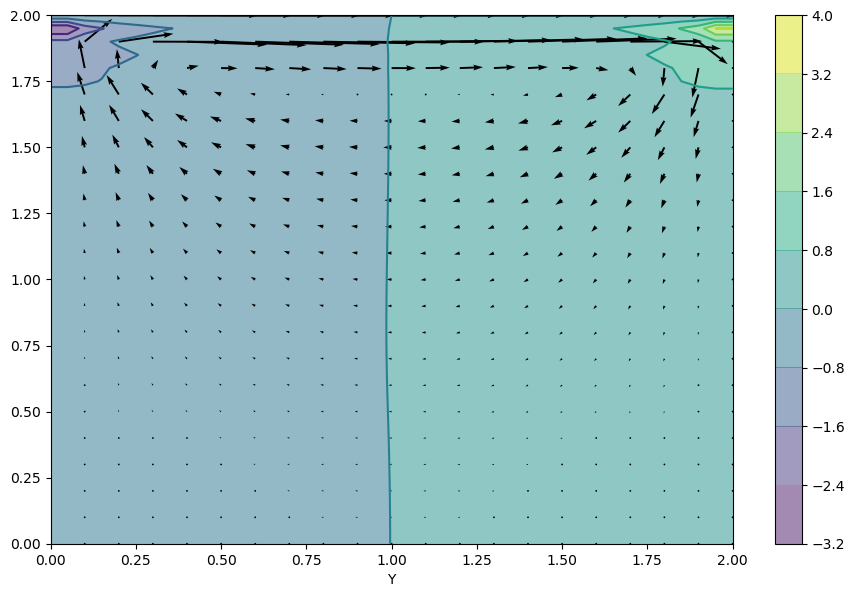

In [7]:
fig = pyplot.figure(figsize=(11,7), dpi = 100)
# plotting the pressure field of a contour
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
# Plotting the pressure field outlines
pyplot.contour(X, Y, p, cmap=cm.viridis)
# plotting the velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
pyplot.xlabel('X')
pyplot.xlabel('Y')

The quiver plot above shows the magnitude of the velocity at the discrete points of the mesh grid we created.  We've actually only shown half the points because otherwise it is a bit messy.  The X[::2, ::2] syntax above is a convienent way to ask for every other point.
<p>Another way to visualize the flow in the cavity is to use a streamplot:

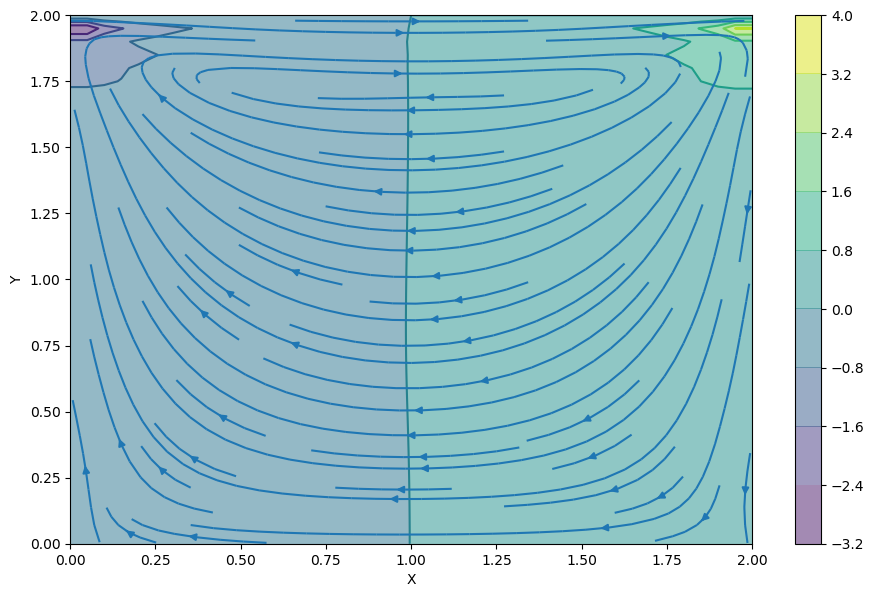

In [8]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p, cmap=cm.viridis)
pyplot.streamplot(X, Y, u, v)
pyplot.xlabel('X')
pyplot.ylabel('Y');

In [12]:
''' 
stream_plot(X,Y, p, u, v)
    uses the _pyplot.streamplot function to plot the CFD variables p, u, v in an X,Y array format.
'''
def stream_plot2D(X, Y, p, u, v):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
    pyplot.colorbar()
    pyplot.contour(X, Y, p, cmap=cm.viridis)
    pyplot.streamplot(X, Y, u, v)
    pyplot.xlabel('X')
    pyplot.ylabel('Y');

In [11]:
help(stream_plot2D)

Help on function stream_plot2D in module __main__:

stream_plot2D(X, Y, p, u, v)



In [13]:
''' quiver_plot2D(X, Y, p, u, v):
    uses the _pyplot.quiverplot function to plot the CFD variables p, u, v in  and X, Y array format.
'''
def quiver_plot2D(X, Y, p, u, v):
    fig = pyplot.figure(figsize=(11,7), dpi = 100)
    # plotting the pressure field of a contour
    pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
    pyplot.colorbar()
    # Plotting the pressure field outlines
    pyplot.contour(X, Y, p, cmap=cm.viridis)
    # plotting the velocity field
    pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
    pyplot.xlabel('X')
    pyplot.xlabel('Y')

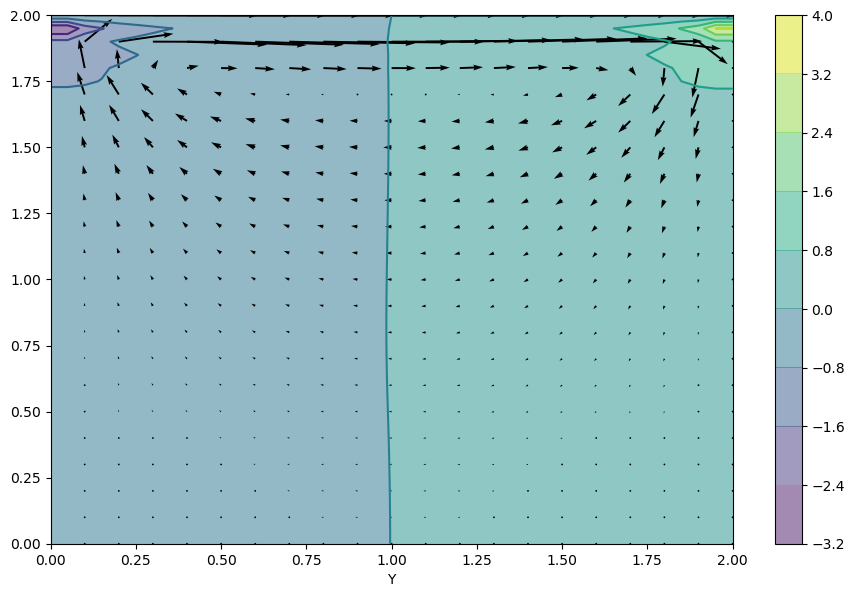

In [20]:
quiver_plot2D(X, Y, p, u, v)

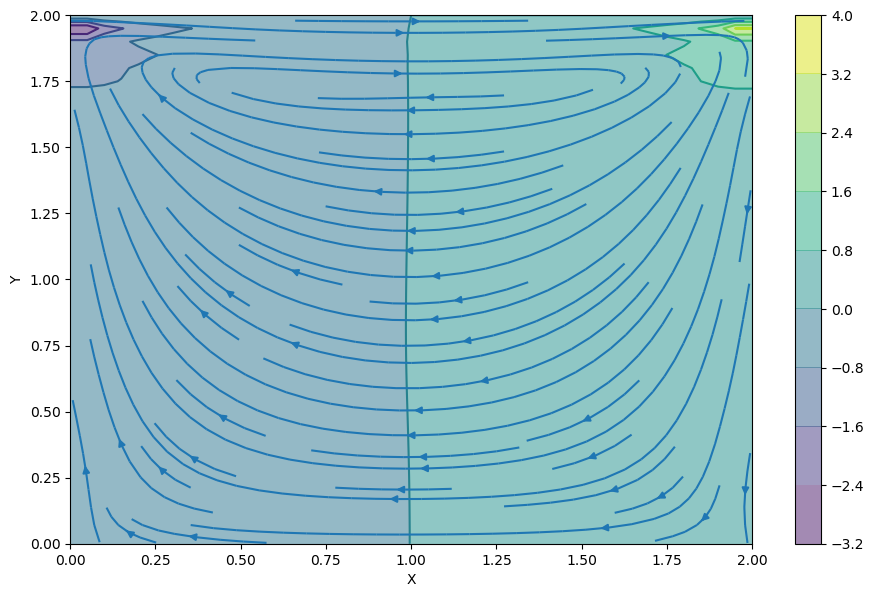

In [14]:
stream_plot2D(X, Y, p, u, v)

In [15]:
u  = numpy.zeros((ny, nx))
v  = numpy.zeros((ny, nx))
p  = numpy.zeros((ny, nx))   #set our initial pressure to 0 everywhere
b  = numpy.zeros((ny, nx))
nt = 500
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

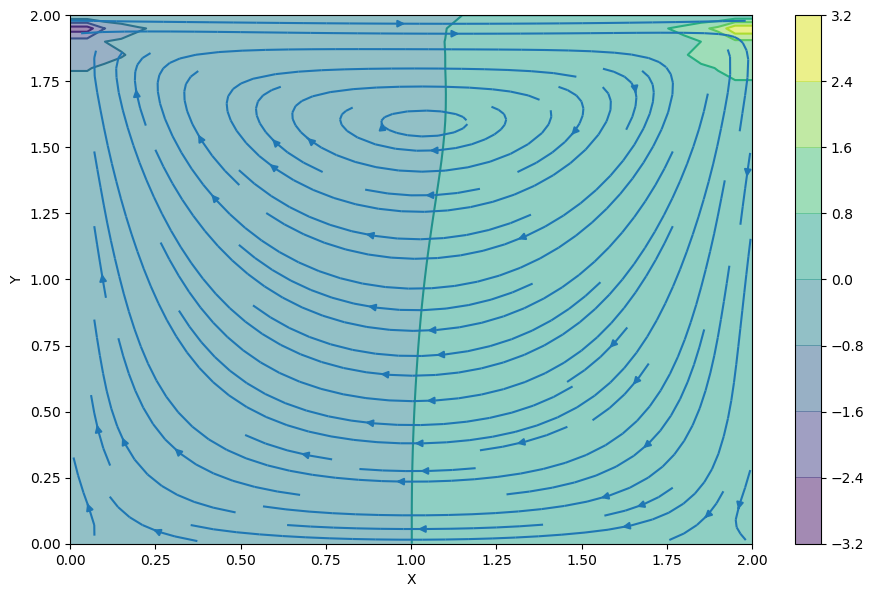

In [16]:
stream_plot2D(X, Y, p, u, v)

<h2>Learn More</h2>
<p>The interactive module 12 steps to Navier–Stokes is one of several components of the Computational Fluid Dynamics class taught by Prof. Lorena A. Barba in Boston University between 2009 and 2013.

For a sample of what the other components of this class are, you can explore the Resources section of the Spring 2013 version of the course's <a href="https://piazza.com/bu/spring2013/me702/resources">Piazza site</a>.</p>

